<a href="https://colab.research.google.com/github/rasith1998/OpenCV/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2#Import open cv library
import numpy as np

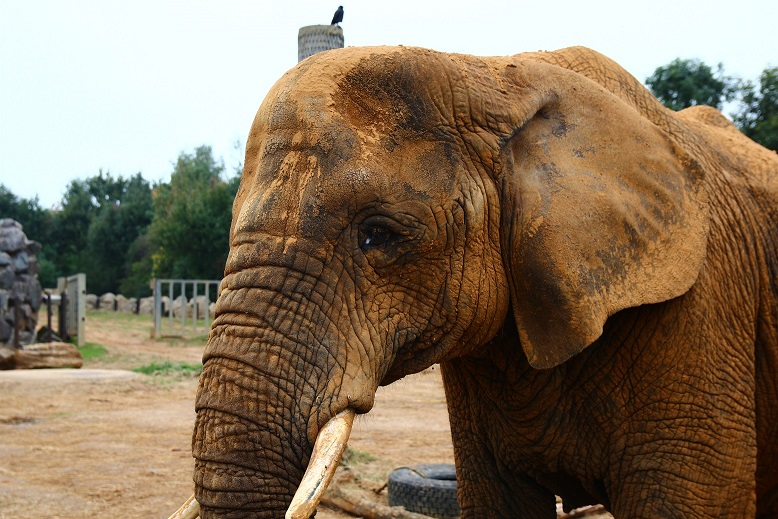

In [7]:
from google.colab.patches import cv2_imshow
# Load an image using 'imread' specifying the path to image
input = cv2.imread('/content/sample_data/elephant.jpg')

# Our file 'input.jpg' is now loaded and stored in python 
# as a varaible we named 'image'

# To display our image variable, we use 'imshow'
# The first parameter will be title shown on image window
# The second parameter is the image varialbe
cv2_imshow(input)#For colab only cv2_imshow()

# 'waitKey' allows us to input information when a image window is open
# By leaving it blank it just waits for anykey to be pressed before 
# continuing. By placing numbers (except 0), we can specify a delay for
# how long you keep the window open (time is in milliseconds here)
cv2.waitKey(0)

# This closes all open windows 
# Failure to place this will cause your program to hang
cv2.destroyAllWindows()

closer look at how images are stored

In [8]:
# Import numpy
import numpy as np
print(input.shape)##Height width color

(519, 778, 3)


In [9]:
# Let's print each dimension of the image

print('Height of Image:', int(input.shape[0]), 'pixels')
print('Width of Image: ', int(input.shape[1]), 'pixels')

Height of Image: 519 pixels
Width of Image:  778 pixels


How to save edited images in open cv

In [10]:
# Simply use 'imwrite' specificing the file name and the image to be saved
cv2.imwrite('output.jpg', input)#we can save it jpg,png format
cv2.imwrite('output.png', input)

True

# Face & Eye Detection using HAAR Cascade Classifiers

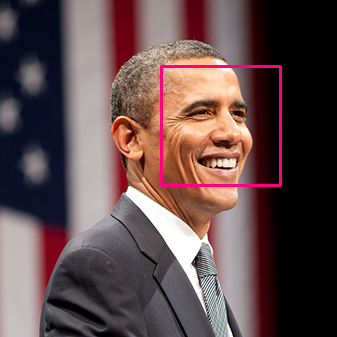

In [14]:
import numpy as np
import cv2

# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored 
face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')#To read XML file

# Load our image then convert it to grayscale
image = cv2.imread('/content/obama.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#this code convert RGB image to gray

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2_imshow(image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

# Let's combine face and eye detection

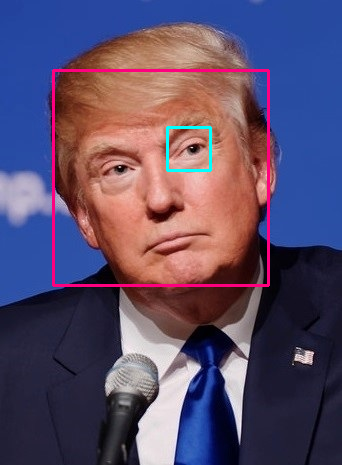

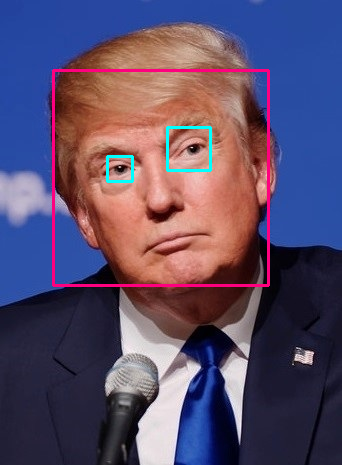

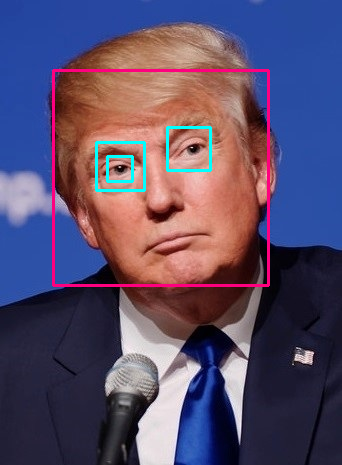

In [18]:
import numpy as np
import cv2
 
face_classifier = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
 
img = cv2.imread('/content/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    #cv2_imshow(img)
    #cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        cv2_imshow(img)
        cv2.waitKey(0)
    
cv2.destroyAllWindows()